In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('headbrain.csv')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
data.shape

(237, 4)

In [9]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [13]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [17]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [24]:
# Total number of values
m = len(X)
m

237

In [25]:
# Using the formula to calculate b1 and b0
numerator = 0
denominator = 0
for i in range(m):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
b1 = numerator / denominator
b0 = mean_y - (b1 * mean_x)

In [26]:
print(b1, b0)

0.26342933948939945 325.57342104944223


In [27]:
# Plotting values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

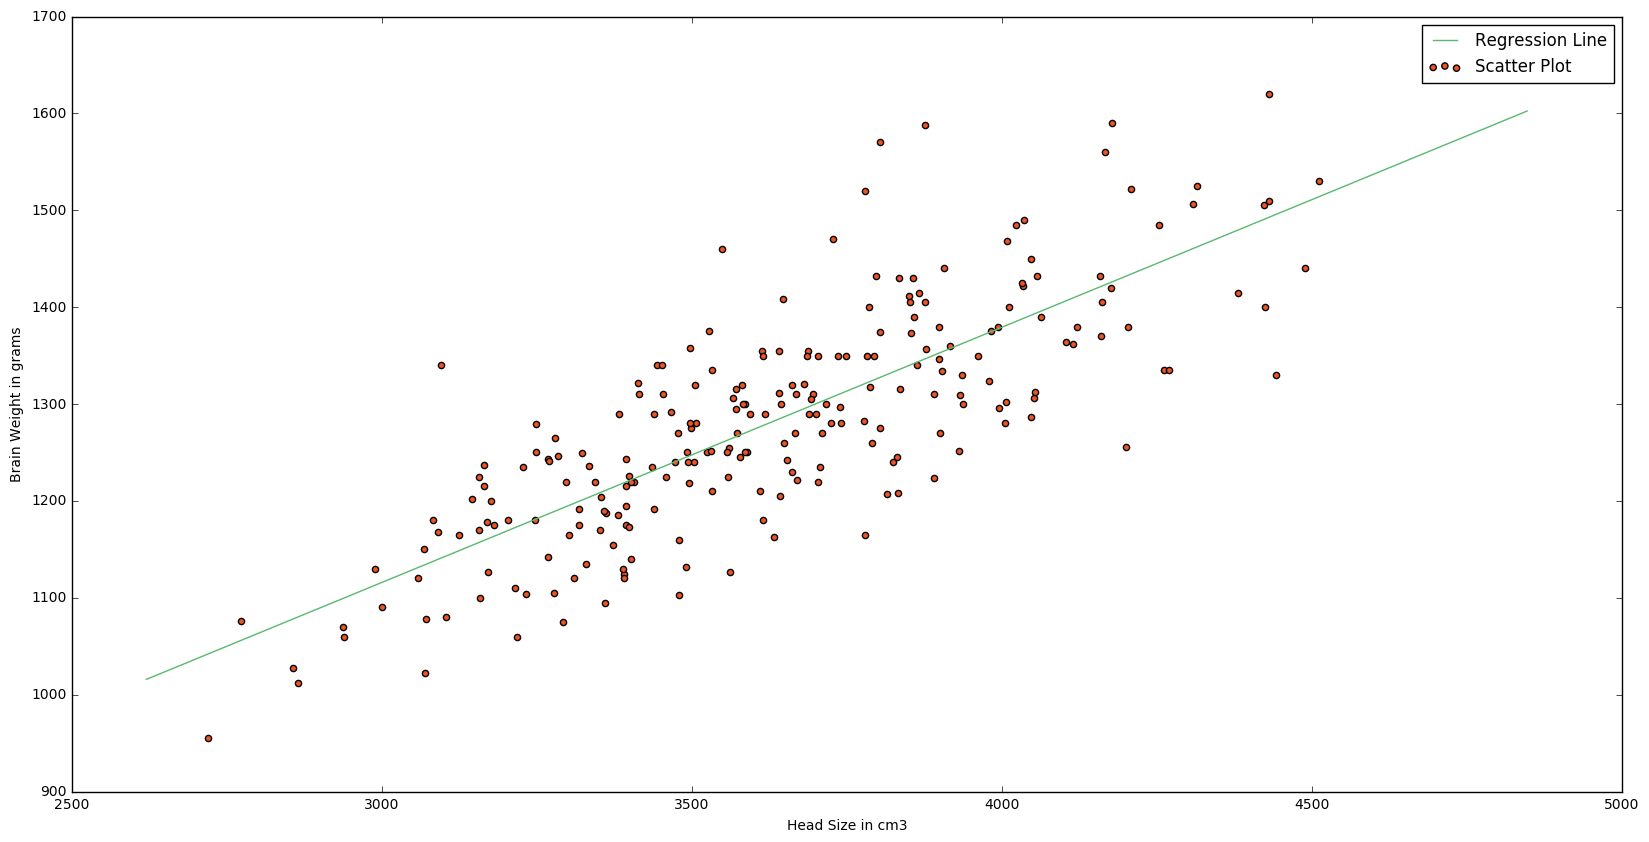

In [29]:
# Plotting Line
plt.plot(x,y, color = '#58b970' , label = 'Regression Line')
# Plotting Scatter Points
plt.scatter(X, Y, c= '#ef5423' , label = 'Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [30]:
# Calculate the R-square value
# to determine how good our modal is
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r / ss_t)
print(r2)

0.6393117199570003


In [31]:
 # Doing the same thing using Scikitlearn

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))

# Creating model
reg = LinearRegression()

# Fitting training Data
reg = reg.fit(X, Y)

#Y Predictionn
Y_Pred = reg.predict(X)

# Claculating R2 Score

r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
